In [81]:
df = pd.read_csv(r"D:\archive2\Latest Football  Players 2024 Data.csv")

print("\n=== Columns in CSV ===")
print(df.columns.tolist())



=== Columns in CSV ===
['Teams', 'Seasons', 'Players', 'Matches', 'Goals', 'Assists', 'Seasons Ratings']


In [71]:
import pandas as pd            
import numpy as np             
import matplotlib.pyplot as plt
import seaborn as sns          
from sklearn.preprocessing import LabelEncoder  

In [72]:
print("\n=== Dataset Shape ===")
print(df.shape)


=== Dataset Shape ===
(1216, 7)


In [73]:
print(df.head())
print("...\n")
print(df.tail())

        Teams    Seasons       Players  Matches  Goals  Assists  \
0  InterMiami       2024  Lionel Messi       15     14       11   
1  InterMiami       2023  Lionel Messi       14     11        5   
2         PSG  2022/2023  Lionel Messi       41     21       20   
3         PSG  2021/2022  Lionel Messi       34     11       14   
4   Barcelona  2020/2021  Lionel Messi       47     38       12   

   Seasons Ratings  
0              8.5  
1              8.0  
2              8.1  
3              7.9  
4              8.4  
...

              Teams    Seasons           Players  Matches  Goals  Assists  \
1211  Real Sociedad  2020/2021  Mikel Oyarzabal        43     13       10   
1212  Real Sociedad  2019/2020  Mikel Oyarzabal        45     13       13   
1213  Real Sociedad  2018/2019  Mikel Oyarzabal        41     14        2   
1214  Real Sociedad  2017/2018  Mikel Oyarzabal        43     14        6   
1215  Real Sociedad  2016/2017  Mikel Oyarzabal        43      4        8   

   

In [74]:
print("\n=== Column Info ===")
print(df.info())


=== Column Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB
None


In [75]:
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
Teams              0
Seasons            0
Players            0
Matches            0
Goals              0
Assists            0
Seasons Ratings    0
dtype: int64


In [76]:
df["Gls_per_match"] = df["Goals"] / df["Matches"]
df["Ast_per_match"] = df["Assists"] / df["Matches"]
df.loc[df["Matches"] == 0, ["Gls_per_match","Ast_per_match"]] = 0
print("\n=== Added Features (Goals & Assists per match) ===")
print(df[["Players", "Goals", "Assists", "Matches", "Gls_per_match", "Ast_per_match"]].head())
print("...")
print(df[["Players", "Goals", "Assists", "Matches", "Gls_per_match", "Ast_per_match"]].tail())


=== Added Features (Goals & Assists per match) ===
        Players  Goals  Assists  Matches  Gls_per_match  Ast_per_match
0  Lionel Messi     14       11       15       0.933333       0.733333
1  Lionel Messi     11        5       14       0.785714       0.357143
2  Lionel Messi     21       20       41       0.512195       0.487805
3  Lionel Messi     11       14       34       0.323529       0.411765
4  Lionel Messi     38       12       47       0.808511       0.255319
...
               Players  Goals  Assists  Matches  Gls_per_match  Ast_per_match
1211  Mikel Oyarzabal      13       10       43       0.302326       0.232558
1212  Mikel Oyarzabal      13       13       45       0.288889       0.288889
1213  Mikel Oyarzabal      14        2       41       0.341463       0.048780
1214  Mikel Oyarzabal      14        6       43       0.325581       0.139535
1215  Mikel Oyarzabal       4        8       43       0.093023       0.186047


In [77]:
encoder = LabelEncoder()
df["Teams_encoded"] = encoder.fit_transform(df["Teams"])
df["Players_encoded"] = encoder.fit_transform(df["Players"])
print("\n=== Encoded Columns Added ===")
print(df[["Teams", "Teams_encoded", "Players", "Players_encoded"]].head())
print("...")
print(df[["Teams", "Teams_encoded", "Players", "Players_encoded"]].tail())


=== Encoded Columns Added ===
        Teams  Teams_encoded       Players  Players_encoded
0  InterMiami             46  Lionel Messi              103
1  InterMiami             46  Lionel Messi              103
2         PSG             67  Lionel Messi              103
3         PSG             67  Lionel Messi              103
4   Barcelona             13  Lionel Messi              103
...
              Teams  Teams_encoded           Players  Players_encoded
1211  Real Sociedad             77  Mikel Oyarzabal               117
1212  Real Sociedad             77  Mikel Oyarzabal               117
1213  Real Sociedad             77  Mikel Oyarzabal               117
1214  Real Sociedad             77  Mikel Oyarzabal               117
1215  Real Sociedad             77  Mikel Oyarzabal               117


In [78]:
print(df.describe())

           Matches        Goals      Assists  Seasons Ratings  Gls_per_match  \
count  1216.000000  1216.000000  1216.000000      1216.000000    1216.000000   
mean     37.024671     8.059211     4.797697         7.111595       0.200247   
std      11.762088     9.351558     4.496019         0.410907       0.213418   
min       1.000000     0.000000     0.000000         5.100000       0.000000   
25%      31.000000     2.000000     1.000000         6.900000       0.046512   
50%      39.000000     4.000000     4.000000         7.100000       0.125000   
75%      46.000000    12.000000     7.000000         7.300000       0.293376   
max      59.000000    55.000000    25.000000         8.900000       1.272727   

       Ast_per_match  Teams_encoded  Players_encoded  
count    1216.000000    1216.000000      1216.000000  
mean        0.122385      47.291941        83.134046  
std         0.108007      28.391985        47.935048  
min         0.000000       0.000000         0.000000  
25% 

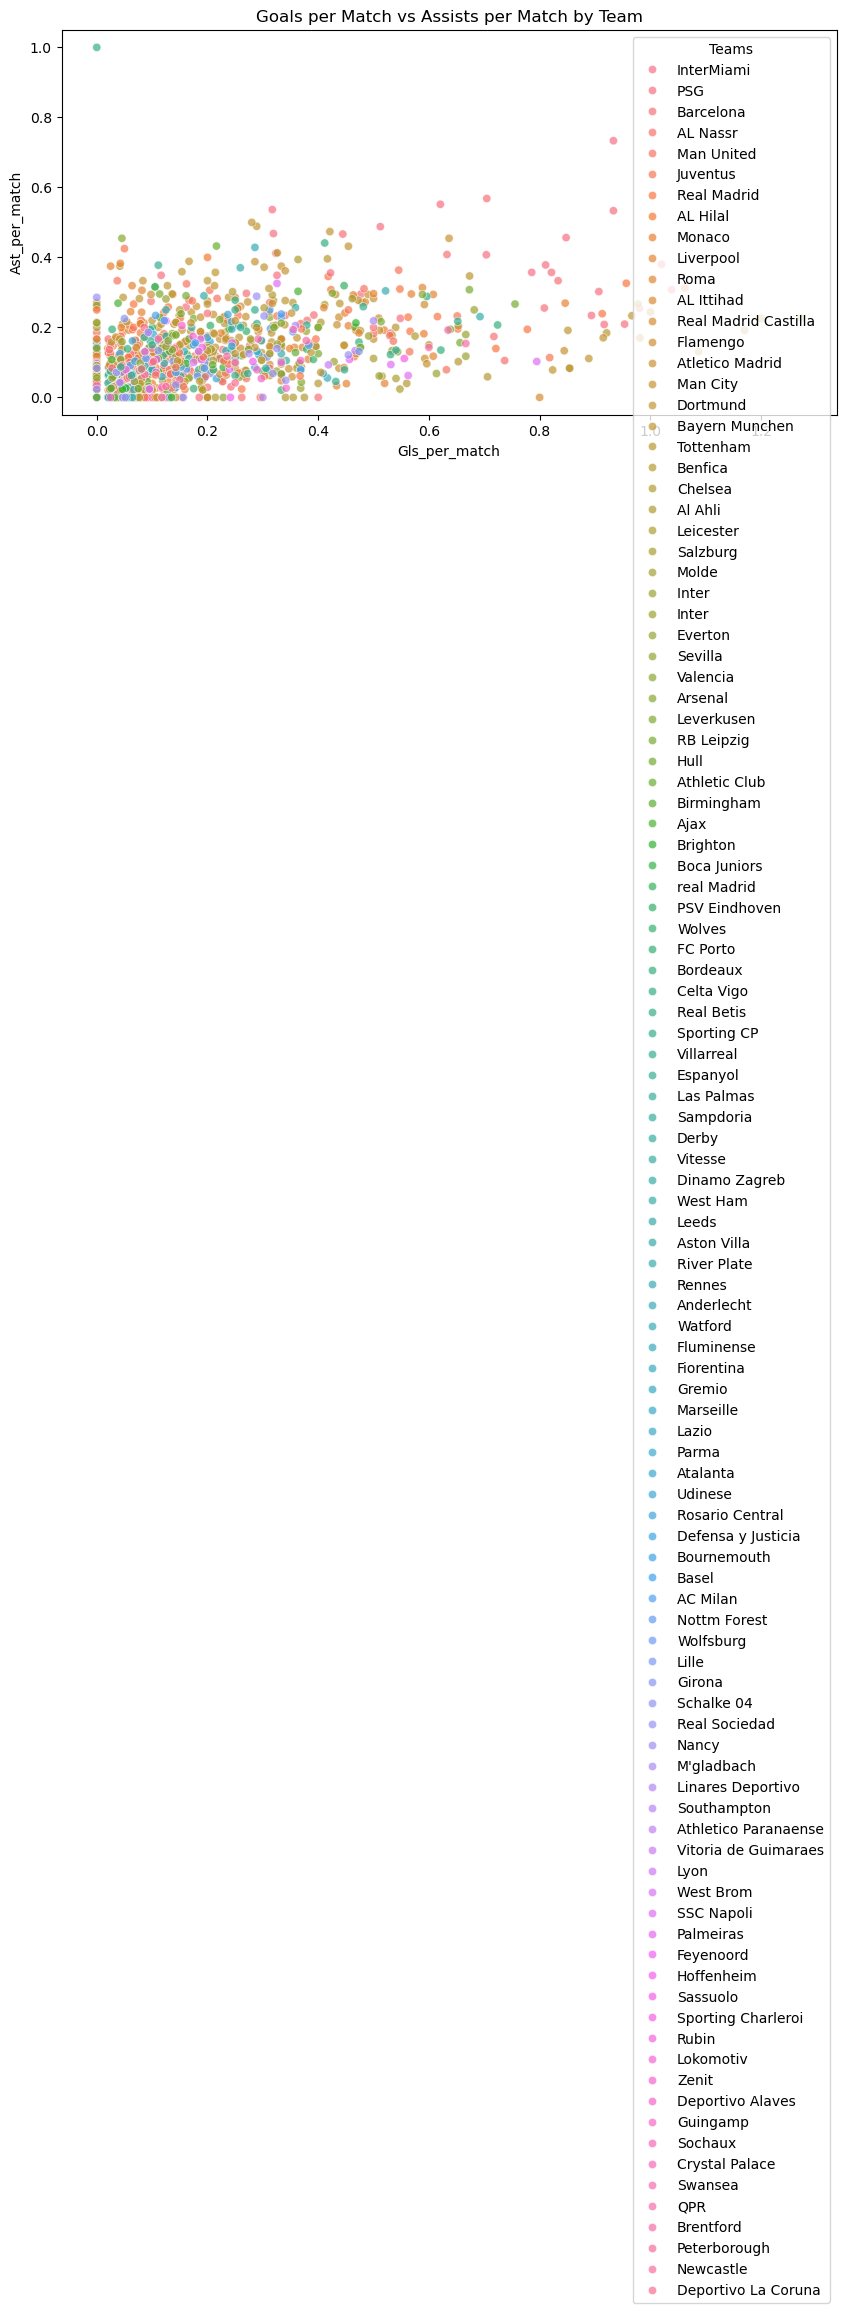

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Gls_per_match", y="Ast_per_match", hue="Teams", alpha=0.7)
plt.title("Goals per Match vs Assists per Match by Team")
plt.show()

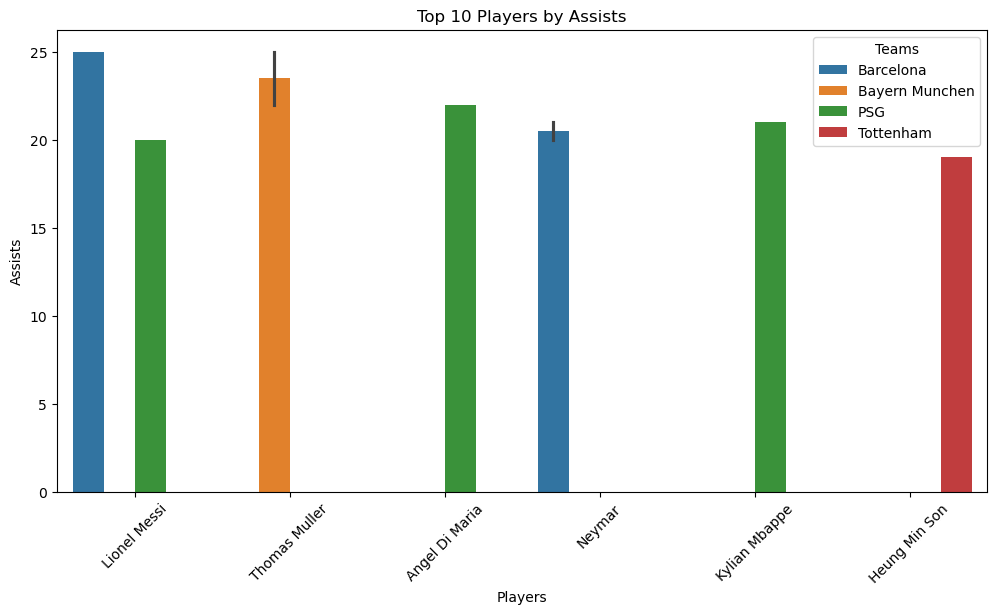

In [80]:
plt.figure(figsize=(12,6))
top_assist = df.sort_values(by="Assists", ascending=False).head(10)
sns.barplot(data=top_assist, x="Players", y="Assists", hue="Teams")
plt.title("Top 10 Players by Assists")
plt.xticks(rotation=45)
plt.show()